In [16]:
import pandas as pd
from entropy import *

In [17]:
with open('resultados.txt', 'r') as f:
    resultados = f.readlines()

sentences = []
num_try = []
for resultado in resultados:
    _, try_ = resultado.split(':')
    try_ = try_.strip()
    try_ = try_.split(',')
    try_[0] = try_[0].split('[')[1]
    try_[-1] = try_[-1].split(']')[0]
    try_ = [int(x) for x in try_]
    sentences.append(try_)

In [18]:
upper_bounds = []
lower_bounds = []
entropy = []
for sentence in sentences:
    up = calc_upper_bound(sentence)
    lb = calc_lower_bound(sentence)
    upper_bounds.append(up)
    lower_bounds.append(lb)
    entropy.append(up)
    
final_entropy = np.mean(entropy)
final_entropy_std = np.std(entropy)

In [19]:
print('Entropia final:', final_entropy, "bps")
print('Desvio padrão:', final_entropy_std, "bps")

Entropia final: 3.01735674403092 bps
Desvio padrão: 0.3174761311989708 bps


In [20]:
upper_bounds_chart = []
lower_bounds_chart = []
for i in range(1, 16):
    upper_bounds = []
    lower_bounds = []
    entropy = []
    for sentence in sentences:
        sentence = sentence[:i]
        up = calc_upper_bound(sentence)
        lb = calc_lower_bound(sentence)
        upper_bounds.append(up)
        lower_bounds.append(lb)
    upper_bounds_chart.append(np.mean(upper_bounds))
    lower_bounds_chart.append(np.mean(lower_bounds))

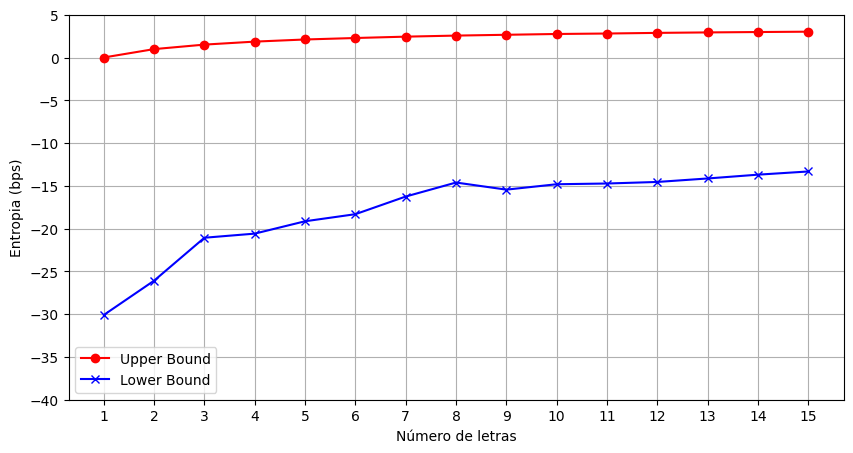

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(range(15), upper_bounds_chart, label='Upper Bound', marker="o", color='red')
plt.plot(range(15), lower_bounds_chart, label='Lower Bound', marker="x", color='blue')
plt.ylim(-40, 5)
plt.xlabel('Número de letras')
plt.ylabel('Entropia (bps)')
plt.legend()
plt.xticks(range(15), range(1, 16))
plt.grid()
plt.show()

In [22]:
len(resultados)

100

In [23]:
table_df = pd.DataFrame(columns=[n for n in range(1, 16)], index=[n for n in range(1, 28)])
table_df.fillna(0, inplace=True)
table_df = pd.DataFrame(columns=[f"ctx_{n}" for n in range(1, 16)], index=[f"g_{n}" for n in range(1, 28)])
table_df.fillna(0, inplace=True)


for i in range(len(resultados)):
    for j in range(15):
        table_df.iloc[sentences[i][j] - 1, j] += 1

table_df

,ctx_1,ctx_2,ctx_3,ctx_4,ctx_5,ctx_6,ctx_7,ctx_8,ctx_9,ctx_10,ctx_11,ctx_12,ctx_13,ctx_14,ctx_15
g_1,9,26,15,13,11,13,19,14,23,19,24,19,21,21,23
g_2,7,13,6,11,9,10,12,12,8,11,6,4,14,13,10
g_3,6,5,13,11,13,12,11,13,3,7,12,12,6,10,14
g_4,7,8,8,3,2,5,6,6,5,6,6,4,6,10,11
g_5,5,3,4,4,8,7,3,9,1,6,1,4,6,5,5
g_6,6,5,2,6,4,9,7,9,5,3,2,3,6,2,7
g_7,3,1,4,6,7,5,10,7,4,5,3,6,6,3,7
g_8,0,5,10,2,2,3,2,2,5,4,3,4,1,4,5
g_9,7,0,4,3,2,3,1,2,3,4,6,1,4,2,2
g_10,0,3,1,3,6,3,2,6,2,4,4,4,3,4,0


In [24]:
table_df.sum(axis=0)

ctx_1     100
ctx_2     100
ctx_3     100
ctx_4     100
ctx_5     100
ctx_6     100
ctx_7     100
ctx_8     100
ctx_9     100
ctx_10    100
ctx_11    100
ctx_12    100
ctx_13    100
ctx_14    100
ctx_15    100
dtype: int64

In [25]:
print(table_df.to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrr}
\toprule
{} &  ctx\_1 &  ctx\_2 &  ctx\_3 &  ctx\_4 &  ctx\_5 &  ctx\_6 &  ctx\_7 &  ctx\_8 &  ctx\_9 &  ctx\_10 &  ctx\_11 &  ctx\_12 &  ctx\_13 &  ctx\_14 &  ctx\_15 \\
\midrule
g\_1  &      9 &     26 &     15 &     13 &     11 &     13 &     19 &     14 &     23 &      19 &      24 &      19 &      21 &      21 &      23 \\
g\_2  &      7 &     13 &      6 &     11 &      9 &     10 &     12 &     12 &      8 &      11 &       6 &       4 &      14 &      13 &      10 \\
g\_3  &      6 &      5 &     13 &     11 &     13 &     12 &     11 &     13 &      3 &       7 &      12 &      12 &       6 &      10 &      14 \\
g\_4  &      7 &      8 &      8 &      3 &      2 &      5 &      6 &      6 &      5 &       6 &       6 &       4 &       6 &      10 &      11 \\
g\_5  &      5 &      3 &      4 &      4 &      8 &      7 &      3 &      9 &      1 &       6 &       1 &       4 &       6 &       5 &       5 \\
g\_6  &      6 &      5 &      2 &  

/tmp/ipykernel_21092/3839065891.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table_df.to_latex())


In [26]:
print(table_df.to_markdown())

|      |   ctx_1 |   ctx_2 |   ctx_3 |   ctx_4 |   ctx_5 |   ctx_6 |   ctx_7 |   ctx_8 |   ctx_9 |   ctx_10 |   ctx_11 |   ctx_12 |   ctx_13 |   ctx_14 |   ctx_15 |
|:-----|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|---------:|---------:|---------:|---------:|---------:|---------:|
| g_1  |       9 |      26 |      15 |      13 |      11 |      13 |      19 |      14 |      23 |       19 |       24 |       19 |       21 |       21 |       23 |
| g_2  |       7 |      13 |       6 |      11 |       9 |      10 |      12 |      12 |       8 |       11 |        6 |        4 |       14 |       13 |       10 |
| g_3  |       6 |       5 |      13 |      11 |      13 |      12 |      11 |      13 |       3 |        7 |       12 |       12 |        6 |       10 |       14 |
| g_4  |       7 |       8 |       8 |       3 |       2 |       5 |       6 |       6 |       5 |        6 |        6 |        4 |        6 |       10 |       11 |
| g_5  |  